In [6]:
import re
import csv

In [8]:
with open("data/pubmed-synthetic.txt", "r", encoding="utf8") as f:
    my_text = f.read()

In [9]:
len(my_text)

6040684

In [10]:
my_text = re.sub(r'\n\s{6}', ' ', my_text)

In [16]:
print(my_text[:2000])

PMID- 24686414
OWN - NLM
STAT- MEDLINE
DCOM- 20140917
LR  - 20211021
IS  - 1740-1534 (Electronic)
IS  - 1740-1526 (Linking)
VI  - 12
IP  - 5
DP  - 2014 May
TI  - A brief history of synthetic biology.
PG  - 381-90
LID - 10.1038/nrmicro3239 [doi]
AB  - The ability to rationally engineer microorganisms has been a long-envisioned goal  dating back more than a half-century. With the genomics revolution and rise of  systems biology in the 1990s came the development of a rigorous engineering  discipline to create, control and programme cellular behaviour. The resulting field,  known as synthetic biology, has undergone dramatic growth throughout the past decade  and is poised to transform biotechnology and medicine. This Timeline article charts  the technological and cultural lifetime of synthetic biology, with an emphasis on  key breakthroughs and future challenges.
FAU - Cameron, D Ewen
AU  - Cameron DE
AD  - 1] Howard Hughes Medical Institute, the Center of Synthetic Biology and the  Depart

In [82]:
countries = []

for ln in my_text.splitlines():
    if ln.startswith("AD  -"):
        
        adreess = ln[:]
        country = re.findall(r'\,\s([\sA-Za-z{2:50}]+)\.', adreess)
        countries.append(country)
        
# Unlist a list of lists
import itertools
countries = list(itertools.chain.from_iterable(countries))
print(countries[1:500])
len(countries)

['USA', 'USA', 'USA', 'USA', 'USA', 'UK', 'UK', 'USA', 'USA', 'USA', 'USA', 'Switzerland', 'Switzerland', 'Switzerland', 'Switzerland', 'Switzerland', 'Switzerland', 'USA', 'USA', 'Switzerland', 'USA', 'Switzerland', 'Switzerland', 'Switzerland', ' Switzerland', 'USA', 'USA', 'USA', 'USA', 'Switzerland', 'Switzerland', 'Switzerland', ' Switzerland', 'China', 'China', 'China', 'China', 'China', 'Greece', 'Sweden', 'Australia', 'Australia', 'Greece', 'Sweden', 'Finland', 'Sweden', 'Finland', 'Sweden', ' China', 'China', 'China', 'China', 'China', 'United  Kindom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'Sweden', 'United Kingdom', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', ' China', 'China', 'China', 'China', ' China', 'China', 'China', 'China', 'China', 'China', 'China', ' China', 'China', 'China', 'Mexico', 'USA', 'Mexico', 'Mexico', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'USA', 'Brazil', 'Brazil', 'Brazil', 'B

9334

In [103]:
zipcodes = re.findall(r'[A-Z]{2}\s(\d{5}), USA', my_text)

In [104]:
len(zipcodes)

241

In [13]:
zipcodes[:10]

['60637',
 '29634',
 '29634',
 '29634',
 '02115',
 '02115',
 '94305',
 '02115',
 '02115',
 '80303']

In [14]:
unique_zipcodes = list(set(zipcodes))

In [15]:
unique_zipcodes.sort()

In [16]:
unique_zipcodes[:10]

['02115',
 '02138',
 '02139',
 '02155',
 '06520',
 '07470',
 '08077',
 '08901',
 '10003',
 '10021']

In [17]:
len(unique_zipcodes)

75

In [18]:
import csv 

In [31]:
zip_coordinates = {}
with open('data/country_coords1.txt') as f:
    csvr = csv.DictReader(f)
    
    for row in csvr:
        country_coords[row['Country']] = [float(row['LT']), 
                                          float(row['LG'])]


In [35]:
zip_code = []
zip_LG = []
zip_LT = []
zip_count = []

In [36]:
for z in unique_zipcodes:
    # if we can find the coordinates
    if z in zip_coordinates.keys():
        zip_code.append(z)
        zip_LT.append(zip_coordinates[z][0])
        zip_LG.append(zip_coordinates[z][1])
        zip_count.append(zipcodes.count(z))

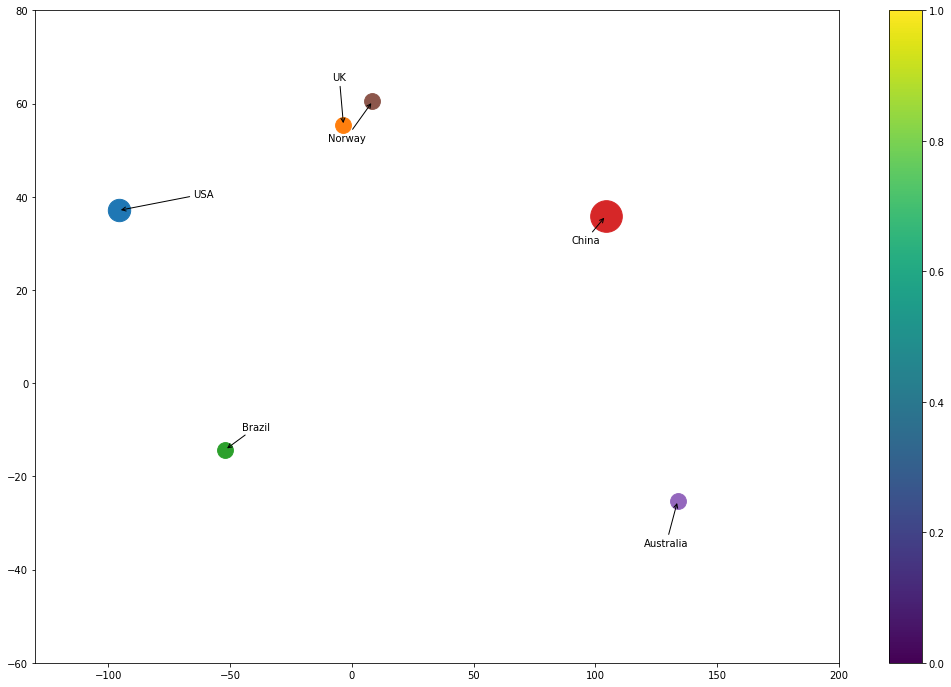

In [100]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zip_LG, zip_LT, s = zip_count, c= zip_count)
plt.colorbar()
# only continental us without Alaska
plt.xlim(-130,200)
plt.ylim(-60, 80)
# add a few cities for reference (optional)
ard = dict(arrowstyle="->")
plt.scatter(-95.712891,37.09024,s=500)
plt.scatter(-3.435973,  55.378051,s=250)
plt.scatter(-51.92528, -14.23500,s=250)
plt.scatter(104.195397 ,35.861661,s=1000)
plt.scatter(133.775136,-25.274398,s=250)
plt.scatter(8.468946,60.472024,s=250)
plt.annotate('USA', xy = (-95.712891,37.09024), 
               xytext = (-65, 40), arrowprops = ard)
plt.annotate('UK', xy = (-3.435973, 55.378051), 
               xytext = (-8, 65), arrowprops= ard)
plt.annotate('Brazil', xy = (-51.92528, -14.235004), 
               xytext = (-45, -10), arrowprops= ard)
plt.annotate('China', xy = (104.195397,35.86166), 
               xytext = (90, 30), arrowprops= ard)
plt.annotate('Australia', xy = (133.775136,-25.274398), 
               xytext = (120, -35), arrowprops= ard)
plt.annotate('Norway', xy = (8.468946,60.472024), 
               xytext = (-10, 52), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()